In [1]:
## After doing the preprocessing on Spyder, it's time to explore the data.
# Anyone who's played Pokemon before knows the struggle of having low HP 
# while facing a fast oponent.
# This cluster shows the Pokemons against which is safe to 'hail mary' and try to
# beat the oponent speed.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv('clean_pokemon.csv')

In [5]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           151 non-null    int64 
 1   Name        151 non-null    object
 2   Type 1      151 non-null    object
 3   Type 2      67 non-null     object
 4   Total       151 non-null    int64 
 5   HP          151 non-null    int64 
 6   Attack      151 non-null    int64 
 7   Defense     151 non-null    int64 
 8   Sp. Atk     151 non-null    int64 
 9   Sp. Def     151 non-null    int64 
 10  Speed       151 non-null    int64 
 11  Generation  151 non-null    int64 
 12  Legendary   151 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 14.4+ KB


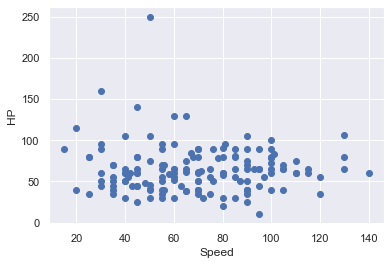

In [17]:
# Let's plot the data

plt.scatter(data['Speed'],data['HP'])
plt.xlabel('Speed')
plt.ylabel('HP')
plt.show()

In [18]:
#There are a few outliers; for instance, Snorlax's HP is huge, and also its weight is.
#So, his speed is considerably low.

In [21]:
## Let's cluster using no scaling and assigning a 4 cluster number based on
# the observation of the plot

In [23]:
# I created a variable to hold the data clustered

x = data[["HP", "Speed"]]

kmeans = KMeans(4)

kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
clusters1 = data.copy()

clusters1['Cluster'] = kmeans.fit_predict(x)

clusters1.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,3
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,3
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,1


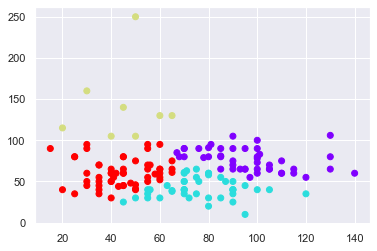

In [28]:
plt.scatter(clusters1['Speed'], clusters1['HP'], c= clusters1['Cluster'], cmap = 'rainbow')
plt.show()

## Next steps:

### 1) standardize data, so the bigger range of health may not influence the speed

### 2) find the optimal number of cluster, using inertia

In [30]:
# Scaling

df_feat = data[["HP", "Speed"]]

from sklearn import preprocessing

x_scaled = preprocessing.scale(df_feat)

x_scaled

array([[-0.67421389, -0.89780272],
       [-0.14781111, -0.33512337],
       [ 0.55405926,  0.41511576],
       [-0.884775  , -0.14756359],
       [-0.21799815,  0.41511576],
       [ 0.48387222,  1.16535489],
       [-0.7093074 , -0.97282663],
       [-0.18290463, -0.41014729],
       [ 0.51896574,  0.34009184],
       [-0.67421389, -0.89780272],
       [-0.49874629, -1.46048207],
       [-0.14781111,  0.03999619],
       [-0.84968148, -0.71024294],
       [-0.67421389, -1.27292229],
       [ 0.02765648,  0.22755597],
       [-0.84968148, -0.4851712 ],
       [-0.04253056,  0.07750815],
       [ 0.65933981,  1.20286684],
       [-1.20061666,  0.11502011],
       [-0.3232787 ,  1.05281902],
       [-0.84968148,  0.03999619],
       [ 0.02765648,  1.16535489],
       [-1.02514907, -0.52268316],
       [-0.14781111,  0.41511576],
       [-1.02514907,  0.79023532],
       [-0.14781111,  1.54047445],
       [-0.49874629, -1.0853625 ],
       [ 0.37859167, -0.14756359],
       [-0.3232787 ,

In [31]:
## Finding the optimal number of clusters with INERTIA and WCSS

wcss = []
# 'cl_num' keeps track the highest number of clusters we want to use the WCSS method
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[302.0,
 196.07621613619537,
 129.7182487444461,
 102.063982319007,
 79.60519272205376,
 63.856003080769135,
 54.508497921004135,
 44.91141956747859,
 38.951231439426245]

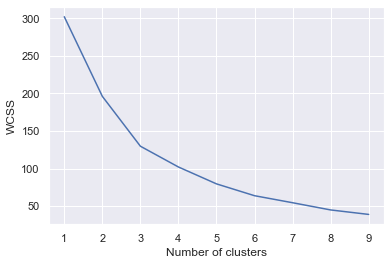

In [32]:
# The elbow plot:

number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
# A good number to try is 3 clusters

In [39]:
kmeans_2 = KMeans(3)

kmeans_2.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

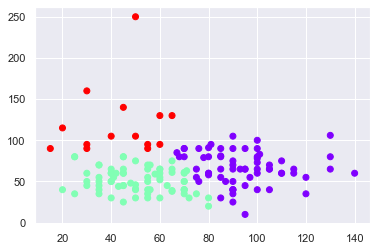

In [40]:
clusters_3 = data.copy()
clusters_3['Clusters'] = kmeans_2.fit_predict(x_scaled)

plt.scatter(clusters_3['Speed'], clusters_3['HP'], c= clusters_3 ['Clusters'], cmap = 'rainbow')
plt.show()

In [41]:
clusters_3

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Clusters
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False,1
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,1,False,1
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False,0
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,0


In [43]:
clusters_3.to_csv(r'data_with_clusters.csv', index = True)

# If our HP is low, 
# should we take a potion or hail mary it?

## Cluster 0 is purple
   ### It represents high speed and low-mid health
   #### Unsafe for "Hail Mary", and trying to one-shot, depending on your Pokemon.
   ##### Advised: taking potion
   
## Cluster 1 is green
   ### Low-mid health and low-mid speed
   #### Safest for one-shotting. Hail Mary if your Pokemon can.

## Cluster 2 is red
   ### High health and low speed
   #### One-shotting is unlikely, unless super-effective + stats boost.
   ##### Advised: taking potion